In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import csv as csv

In [16]:
with open("test_1", "w", newline="") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(["row1", "row2"])

with open("test_1", "r", newline="") as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


['row1', 'row2']


In [7]:
# intitial 2-20cm test
df1 = pd.read_csv("2-20cm.csv")
data1 = df1.to_numpy()


static_raw = data1[:,1]
static_raw = np.insert(static_raw, 0, 2.0)
static_list = np.array_split(static_raw, 42)

static_avg = np.array([])
for arr in static_list:
    static_avg = np.append(static_avg, np.mean(arr))




FileNotFoundError: [Errno 2] No such file or directory: '2-20cm.csv'

In [ ]:
# improve code: initial 2-20cm test
# assume df has 2 cols: trial distance and actual distance

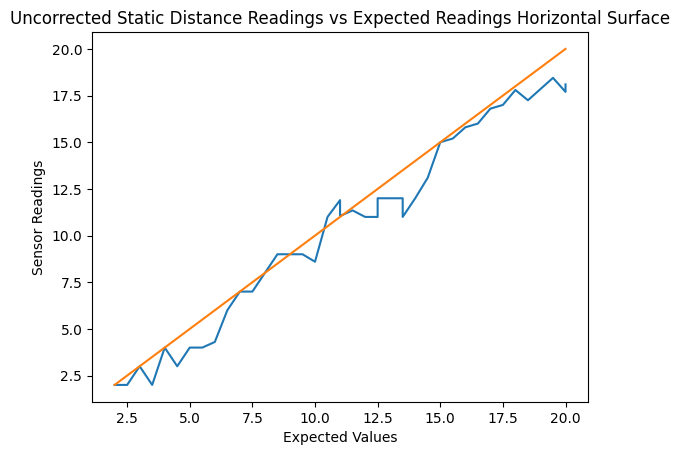

In [13]:
# First measurement: 2-20cm on a flat surface. 

expected_2_20cm = np.array([2, 2.5, 3, 3.5, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11, 11.5, 12, 12.5, 12.5, 13, 13.5, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20])

plt.plot(expected_2_20cm, static_avg)
plt.plot(expected_2_20cm, expected_2_20cm)
plt.title("Uncorrected Static Distance Readings vs Expected Readings Horizontal Surface")
plt.xlabel("Expected Values")
plt.ylabel("Sensor Readings")
plt.show()


In [14]:
# data analysis

def calc_mae(actual, predicted):
    error = np.abs(actual - predicted)
    mae = np.mean(error)
    return mae

#std_dev = np.std(np.array(averages)) #std_dev is incorrect, need to take between each 20 point dataset
mae = calc_mae(static_avg, expected_2_20cm)

#print(f'Std Dev: {std_dev}')
print(f'MAE: {mae}')






MAE: 0.8369047619047618


<function matplotlib.pyplot.show(close=None, block=None)>

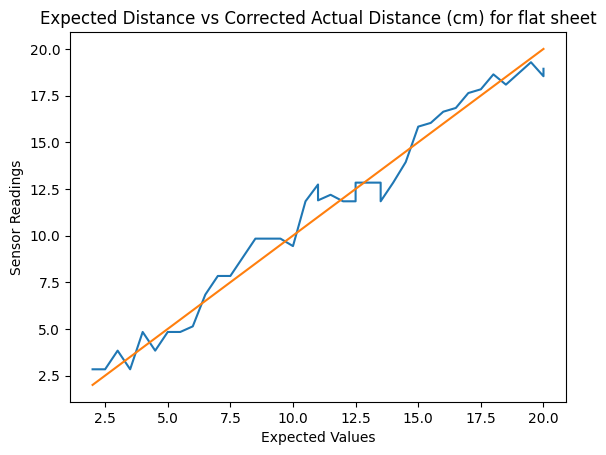

In [15]:
# correction factor for 2-20cm on flat surface
# data is typically under expected_2_20cm, apply correction factor:

static_corrected = static_avg + mae

plt.plot(expected_2_20cm, static_corrected)
#plt.plot(expected_2_20cm, avg_actual)
plt.title("Expected Distance vs Corrected Actual Distance (cm) for flat sheet")
plt.ylabel("Sensor Readings")
plt.xlabel("Expected Values")
plt.plot(expected_2_20cm, expected_2_20cm)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

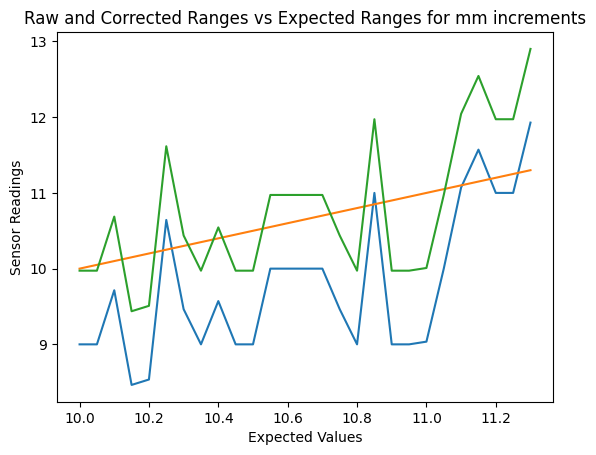

In [16]:
# look at 10-11cm data on flat surface:
# goal is to determine rangefinder sensitivity

expected_mm = np.array([
10.00,
10.05,
10.1,
10.15,
10.2,
10.25,
10.3,
10.35,
10.4,
10.45,
10.5,
10.55,
10.6,
10.65,
10.7,
10.75,
10.8,
10.85,
10.9,
10.95,
11,
11.05,
11.1,
11.15,
11.2,
11.25,
11.3,
])

avg_actual_mm = np.array([9, 9, 9.71428571428571, 8.46428571428571, 8.53571428571429, 10.6428571428571, 9.46428571428571, 9, 9.57142857142857, 9, 9, 10, 10, 10, 10, 9.46428571428571, 9, 11, 9, 9, 9.03571428571429, 10, 11.0714285714286, 11.5714285714286, 11, 11, 11.9285714285714])

mae_mm = calc_mae(avg_actual_mm, expected_mm)
corrected_mm = avg_actual_mm + mae_mm

plt.plot(expected_mm, avg_actual_mm)
plt.plot(expected_mm, expected_mm)
plt.plot(expected_mm, corrected_mm)
plt.title("Raw and Corrected Ranges vs Expected Ranges for mm increments")
plt.xlabel("Expected Values")
plt.ylabel("Sensor Readings")
plt.show

In [17]:
# Data for 2-20cm on a Convex Surface:
# Oriented the sensor both horizontally and vertically, we would expected verticle
# sensor will get better readings due to its orientation

df2 = pd.read_csv("round_horizontal_2-20cm.csv")
data2 = df2.to_numpy()

df3 = pd.read_csv("round_verticle_2-20cm.csv")
data3 = df3.to_numpy()

horizontal_raw = data2[:,0]
verticle_raw = data3[:,0]

horizontal_list = np.array_split(horizontal_raw, 37)
verticle_list = np.array_split(verticle_raw, 37)

horizontal_avg = np.array([])
for arr in horizontal_list:
    horizontal_avg = np.append(horizontal_avg, np.mean(arr))

verticle_avg = np.array([])
for arr in verticle_list:
    verticle_avg = np.append(verticle_avg, np.mean(arr))


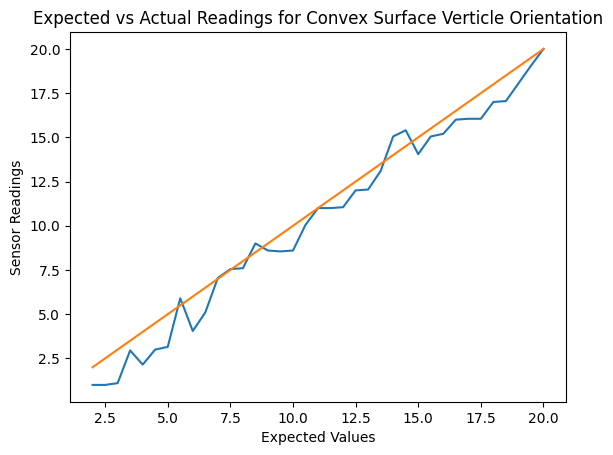

In [18]:
# Graph 2-20cm Convex Surface Data data

expected2 = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20])

#plt.plot(expected2, horizontal_avg)
plt.plot(expected2, verticle_avg)
plt.plot(expected2, expected2)
plt.title("Expected vs Actual Readings for Convex Surface Verticle Orientation")
plt.xlabel("Expected Values")
plt.ylabel("Sensor Readings")
#plt.plot(expected, avg_actual)
plt.show()

#funny, appears since horizintal sensor "overreads" on a concave object,
#it actually offets to some extent the pattern where it under-reads
#by 1cm, meaning it is somewhat already fitted to expected values

#the vertically oriented sensor is consistent with the results of the
#horizontal sensor on a flat surface. 

MAE HORZ: 0.47432432432432403
MAE VERT: 0.8729729729729729


<function matplotlib.pyplot.show(close=None, block=None)>

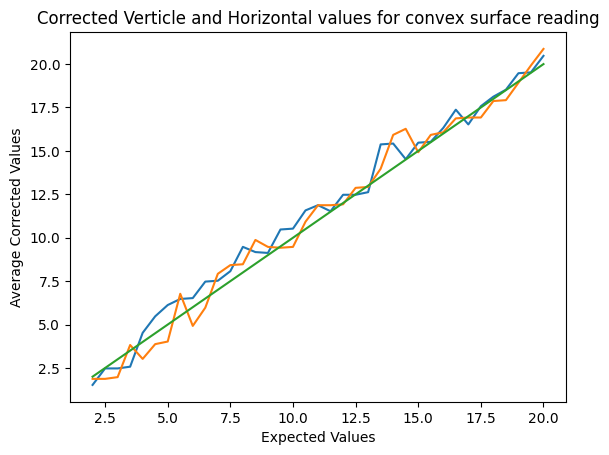

In [24]:
# see if correction factor is similar:

mae_horizontal = calc_mae(horizontal_avg, expected2)
print(f'MAE HORZ: {mae_horizontal}')

mae_verticle = calc_mae(verticle_avg, expected2)
print(f'MAE VERT: {mae_verticle}')

horizontal_corrected = horizontal_avg + mae_horizontal
verticle_corrected = verticle_avg + mae_verticle

plt.plot(expected2, horizontal_corrected)
plt.plot(expected2, verticle_corrected)
plt.title("Corrected Verticle and Horizontal values for convex surface reading")
plt.ylabel("Average Corrected Values")
plt.xlabel("Expected Values")
plt.plot(expected2, expected2)
plt.show

#looks like MAE is very similar to horizontal, at least data is somewhat
#consistent with itself

#interestlying, both graphs appear to misread at similar spots. Why is this?

In [36]:
# convave surface, or inside the borehole:
# trying using median value from 20 reading dataset gives a better correction factor

expected3 = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])


df4 = pd.read_csv("2-20cm_data.csv")
data4 = df4.to_numpy()

concave_raw = data4[:,0]
concave_list = np.array_split(concave_raw, 17)

concave_avg = np.array([])
for arr in concave_list:
    concave_avg = np.append(concave_avg, np.mean(arr))

concave_median = np.array([])
for arr in concave_list:
    concave_median = np.append(concave_median, np.median(arr))

mae = calc_mae(concave_median, expected3)
print(f'MAE: {mae}')

concave_median_corrected = concave_median + mae

MAE: 0.5511764705882354


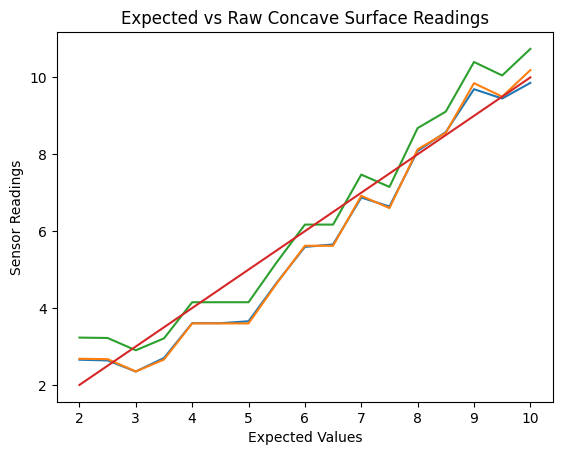

In [37]:
# plot data
                      
plt.plot(expected3, concave_avg)
plt.plot(expected3, concave_median)
plt.plot(expected3, concave_median_corrected)
plt.plot(expected3, expected3)
plt.title("Expected vs Raw Concave Surface Readings")
plt.xlabel("Expected Values")
plt.ylabel("Sensor Readings")
plt.show()

In [23]:
# data:
with open("scope_testing_distance_verticle") as f:
    f.to_numpy()



FileNotFoundError: [Errno 2] No such file or directory: 'scope_testing_distance_verticle'